In [7]:
#setting parameters
import random
import math
p=0.9#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [8]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [9]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


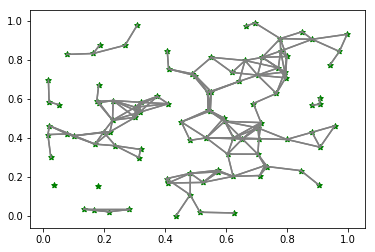

In [10]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,35,38,43,57,83,10,3,5,9,53,48,72,74,93,32,29,99,30,37,67,76,2,4,20,1,44,18,25,13,11,45,90,94,71,86,14,23,69,98,81,61,80,97,21,50,36,24,64,91,46,68,82,56,27,39,51,16,75,70,41
6,26,47,54,55,95,33,17,52,66,85,89,92,19,63,60,7,73,15,40,42,31
8,12,34
22,28,78
49,59,77,87,96
58,65,79,84
62
88


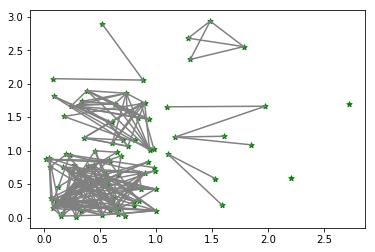

In [11]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

The component consisting of the nodes:

0,35,38,43,57,83,10,3,5,9,53,48,72,74,93,32,29,99,30,37,67,76,2,4,20,1,44,18,25,13,11,45,90,94,71,86,14,23,69,98,81,61,80,97,21,50,36,24,64,91,46,68,82,56,27,39,51,16,75,70,41
has a cycle consisting of the nodes:

35,43,0
The component consisting of the nodes:

6,26,47,54,55,95,33,17,52,66,85,89,92,19,63,60,7,73,15,40,42,31
has a cycle consisting of the nodes:

26,54,6
The component consisting of the nodes:

8,12,34
has no cycle

The component consisting of the nodes:

22,28,78
has no cycle

The component consisting of the nodes:

49,59,77,87,96
has no cycle

The component consisting of the nodes:

58,65,79,84
has a cycle consisting of the nodes:

65,79,58
The component consisting of the nodes:

62
has no cycle

The component consisting of the nodes:

88
has no cycle



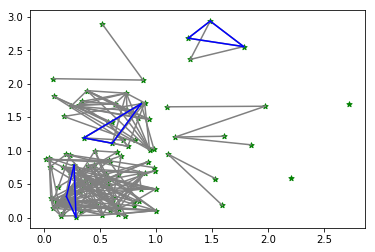

In [12]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")